In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
import warnings

import plotly.express as px

In [5]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [6]:
df = pd.read_csv('../../covid-19-data/us-states.csv')

In [4]:
def plot_hmm(state, metric='cases', dates_of_interest=None, hmm_plot=False, n_components=3):
    '''
    You can switch metric to 'deaths' if you want.
    
    '''
    df = pd.read_csv('../../covid-19-data/us-states.csv')
    state_df = df[df['state'] == state]
    state_df.drop(columns='state', inplace=True)
    state_df['date']= pd.to_datetime(state_df['date'])
    state_df.set_index('date', inplace=True)
    state_diff = state_df.diff()
    state_diff.dropna(inplace=True)
    X = state_diff[[metric]]


    plt.figure(figsize=(14, 4))

    
    if hmm_plot:
        
        model = hmm.GaussianHMM(n_components=n_components)
        model.fit(X)
        preds = model.predict(X) / 2
        plt.plot(X.index, preds, marker='', label='Regimes', color='#F59808')

    
    
    plt.plot(X/(X.max() - X.min()), label=f'Change in {metric.title()}', color='#810D0D')
    plt.xlabel('Date')
    plt.ylabel('Rate of Change')
    if dates_of_interest:
        for date in dates_of_interest:
            plt.axvline(x=date, label=date, color='black')
    plt.legend()
    plt.title(f'{state.title()} Daily COVID-19 Case Change')

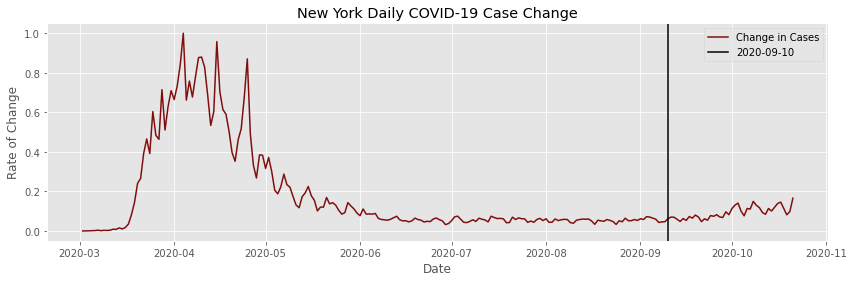

In [5]:
plot_hmm('New York', 'cases', ['2020-09-10'], False,1)

In [15]:
def plot_hmm_px(state, metric='cases', dates_of_interest=None, hmm_plot=False, n_components=3, fig_type = 'Normalized Daily Change'):
    '''
    You can switch metric to 'deaths' if you want.
    
    '''
    df = pd.read_csv('../../covid-19-data/us-states.csv')
    state_df = df[df['state'] == state]
    state_df.drop(columns='state', inplace=True)
    state_df['date']= pd.to_datetime(state_df['date'])
    state_df.set_index('date', inplace=True)
    state_diff = state_df.diff()
    state_diff.dropna(inplace=True)
    
    Xcuml = state_df[[metric]]
    X = state_diff[[metric]]


    #plt.figure(figsize=(14, 4))
    
    fig = px.line(X/(X.max() - X.min()),title=f'{state.title()} Daily COVID-19 {metric.capitalize()} Change')
    fig_abs_change = px.line(X,title=f'{state.title()} Daily COVID-19 {metric.capitalize()} Change')
    fig_cuml_change = px.line(Xcuml,title=f'{state.title()} Daily COVID-19 {metric.capitalize()} Change')
    
    if dates_of_interest:
        i=0
        j=0
        k=0
        for date in dates_of_interest:
            #fig.add_shape(type="line",x0 =date,x1=date,y0=0,y1=1.1)
            fig.add_scatter(x=(date,date),y=(0,1.1),line={'color': f'rgb({i},{j},{k})','width': 2,}, name='Superspreader')
            #plt.axvline(x=date, label=date, color='black')
    
    if hmm_plot:  
        model = hmm.GaussianHMM(n_components=n_components)
        model.fit(X)
        preds = model.predict(X) / 2
        fig.add_scatter(x=X.index, y=preds, name='Regime')
    
    if fig_type == 'Normalized Daily Change':
        return fig
    elif fig_type == 'Absolute Daily Change':
        return fig_abs_change
    elif fig_type == 'Cumulative Daily Change':  
        return fig_cuml_change

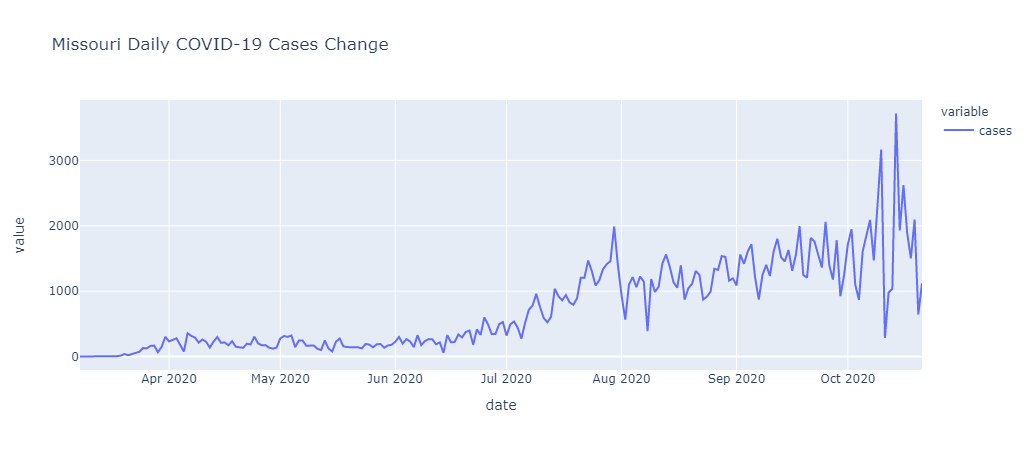

In [17]:
plot_hmm_px(
    state='Missouri', 
    metric='cases', 
    dates_of_interest=['2020-09-10','2020-09-20'], 
    hmm_plot=True,
    n_components=3,
    fig_type = 'Absolute Daily Change'
)

In [8]:
state = 'Missouri'

In [9]:
state_df = df[df['state'] == state]
state_df.drop(columns='state', inplace=True)
state_df['date']= pd.to_datetime(state_df['date'])
state_df.set_index('date', inplace=True)
state_diff = state_df.diff()
state_diff.dropna(inplace=True)
X = state_diff[['cases']]

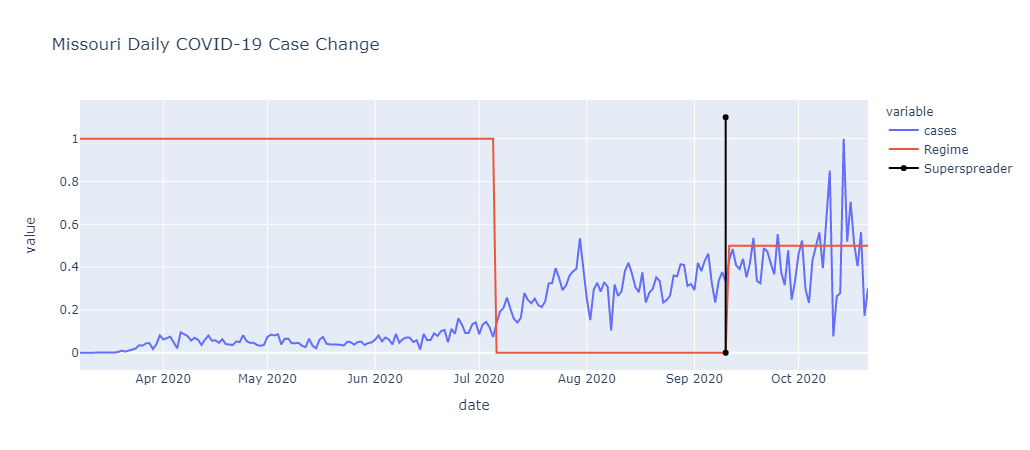

In [10]:
model = hmm.GaussianHMM(n_components=3)
model.fit(X)
preds = model.predict(X) / 2

fig = px.line(X/(X.max() - X.min()),title=f'{state.title()} Daily COVID-19 Case Change',labels='dude')
fig.add_scatter(x=X.index, y=preds, name='Regime',fillcolor='green')
#fig.add_shape(type="line",x0 ='2020-09-10',x1='2020-09-10',y0=0,y1=1.1,fillcolor='blue')
fig.add_scatter(x=('2020-09-10','2020-09-10'),y=(0,1.1),line={'color': 'rgb(0,0,0)','width': 2,}, name='Superspreader')

In [11]:
date_list = ['2020-09-10','2020-09-20']

In [12]:
pd.to_datetime(date_list[0])

Timestamp('2020-09-10 00:00:00')

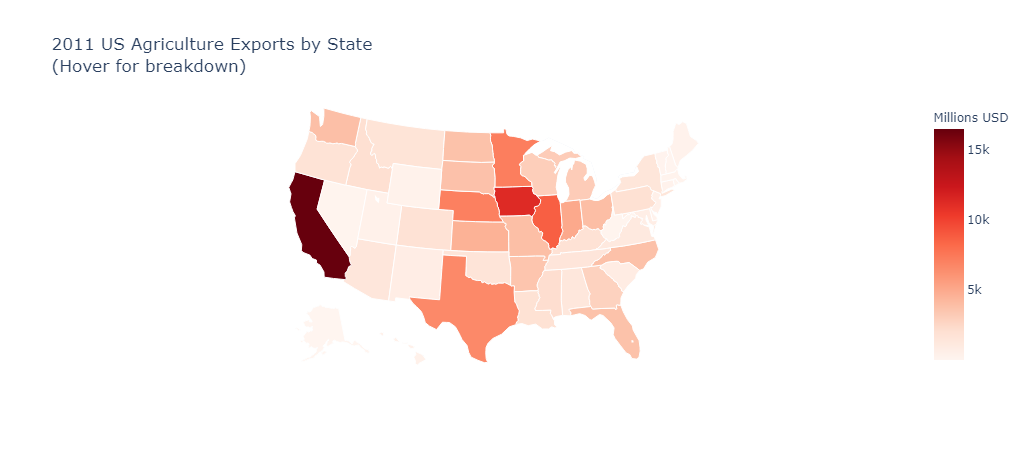

In [13]:
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()